#  Ford GoBike System
## by Hanin Falatah

## Investigation Overview

> this doucment look at the GoBike System user behavier, the fouce in the analysis was time and the high damand om the system. 

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. this reserch is in the time peroied from 06/2017 to 01/2018.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('master.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## User type for GoBike system

> the plots show that 21.3% of the users are Subscriber, and the other 78.7% are Customer

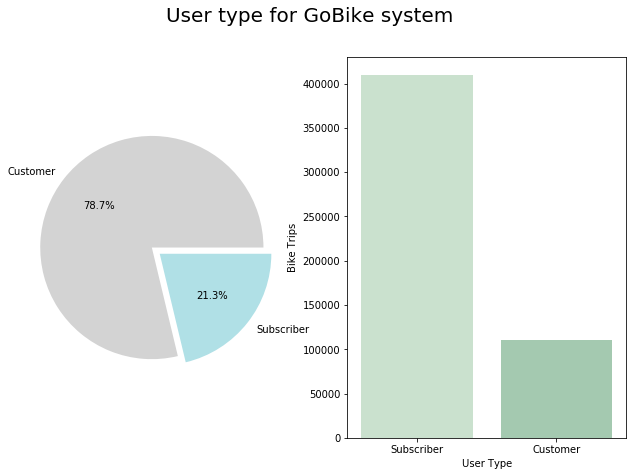

In [10]:
labels = ['Customer', 'Subscriber']
colors = ['LightGrey', 'PowderBlue']

plt.subplot(1, 2, 1)
plt.suptitle('User type for GoBike system', fontsize=20);
plt.pie(df.user_type.value_counts(), explode=(0.0,0.09), labels=labels, colors = ['LightGrey', 'PowderBlue'],
        autopct='%1.1f%%')

plt.subplot(1, 2, 2) 
sb.countplot(data=df, x="user_type", order=df.user_type.value_counts().index, palette=sb.color_palette("ch:2.5,-.2,dark=.3"))
plt.gcf().set_size_inches(11,7)
plt.xlabel('User Type')
plt.ylabel('Bike Trips')

plt.show()

## Trip Duration by Subsciber

> The plot is positively skewed which mean that data is skewed the right the mean is greater than the median, and here the data shows that 800 secound which is 13.3 min most of the bick trips are 13.3 min for the Subsciber

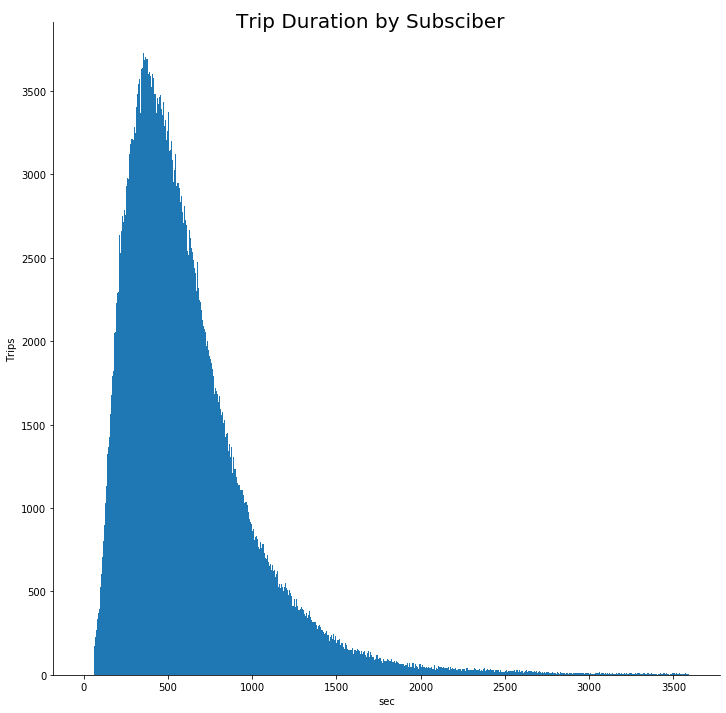

In [16]:
g = sb.FacetGrid(data = df.query('user_type != "Customer"'), col="user_type",height = 10)

g.map(plt.hist,'duration_sec', bins = np.arange(0, 3600, 6))
g.set_axis_labels("sec", "Trips")
plt.title(" ")
plt.suptitle('Trip Duration by Subsciber', fontsize=20);

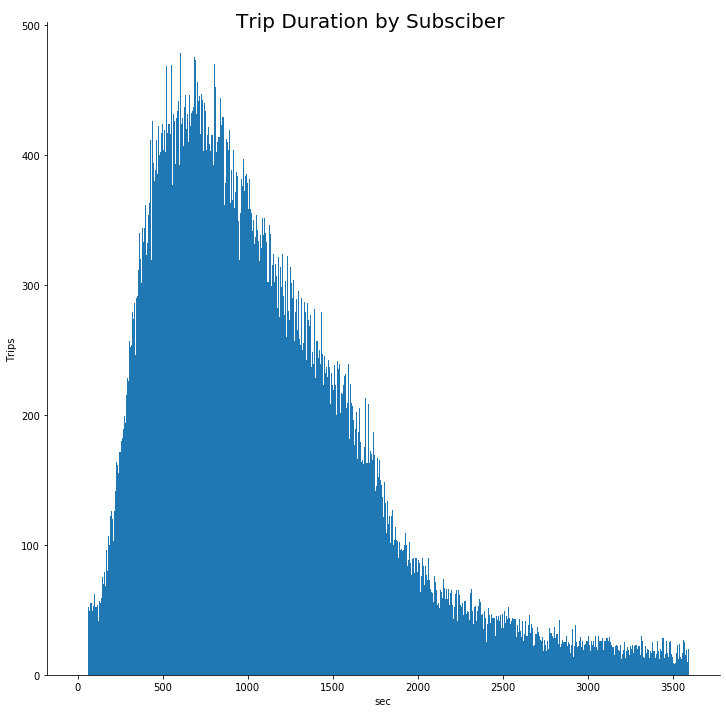

In [22]:
g = sb.FacetGrid(data = df.query('user_type == "Customer"'), col="user_type",height = 10)

g.map(plt.hist,'duration_sec', bins = np.arange(0, 3600, 6))
g.set_axis_labels("sec", "Trips")
plt.title(" ")
plt.suptitle('Trip Duration by Subsciber', fontsize=20);

using the user type in the analysis show the trip duration for  customers and subscribers, which for customers let you see that the trips are longer than subscribers trips.

##  Daily weekly usage habits for subscribers vs customers
the plot shows:

the Different behavior habits for the diffent uers types.

### Customers:

**Weekend:** the usege is mostly is at 8AM and 5PM in and the peek is Friday.
**Weekdays:** the usege is mostly is at 10AM - 5PM in the Weekend and sturday at 1PM - 2PM is the peek.

### Subscriber:

**Weekend:** the usege is mostly is at 8AM and 5PM in and the peek is Tuesday.
**Weekdays:** there are a big drop in the system usege comperied to the weekdays.

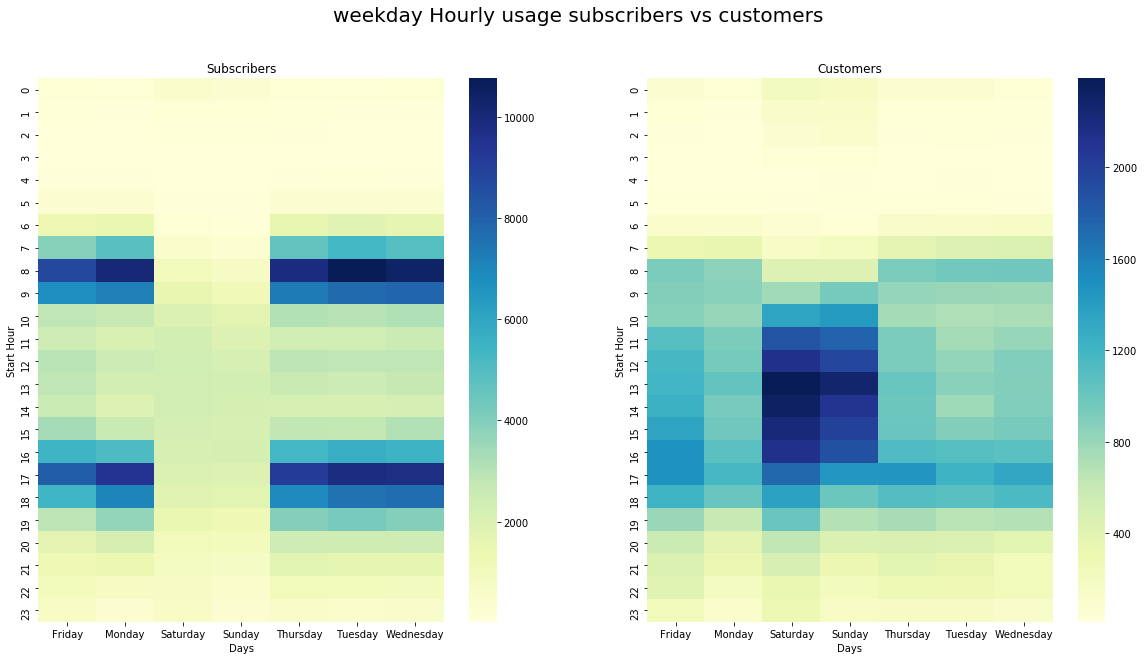

In [19]:
plt.subplots(figsize=(20,10))
plt.suptitle('weekday Hourly usage subscribers vs customers', fontsize=20)
plt.subplot(1, 2, 1)

df_customer = df.query('user_type == "Subscriber"').groupby(["start_hour", "start_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_hour", "start_weekday", "bike_id")

sb.heatmap(df_customer, cmap="YlGnBu")
plt.title("Subscribers")
plt.xlabel('Days')
plt.ylabel('Start Hour')

plt.subplot(1, 2, 2)

df_customer = df.query('user_type == "Customer"').groupby(["start_hour", "start_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_hour", "start_weekday", "bike_id")

sb.heatmap(df_customer, cmap="YlGnBu")
plt.title("Customers")
plt.xlabel('Days')
plt.ylabel('Start Hour')

plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!